In [91]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
# from adjustText import adjust_text


In [34]:
!cp -s /data2/wangxuedong/mhc_test_data/race/mhc.csv ../csvfiles/mhc_race.csv
!cp -s /data2/wangxuedong/mhc_test_data/csvfiles/posmhc.csv ../csvfiles/posmhc_all.csv

cp: cannot create symbolic link '../csvfiles/mhc_race.csv' to '/data2/wangxuedong/mhc_test_data/race/mhc.csv': File exists
cp: cannot create symbolic link '../csvfiles/posmhc_all.csv' to '/data2/wangxuedong/mhc_test_data/csvfiles/posmhc.csv': File exists


In [35]:

mhc_race_positions_dict={'ACB': {'mhc': [[32589647, 32805573]]},
'All':{'mhc':[[32453110, 32577355], [32589647, 32716541]]},
 'ASW': {'mhc': [[29753369, 29913914],
   [29939668, 30120966],
   [32627859, 32843772]]},
 'BEB': {},
 'CDX': {'mhc': [[31295439, 31432528]]},
 'CEU': {'mhc': [[32627859, 32776791]]},
 'CHB': {},
 'CHS': {'mhc': [[32589647, 32716541]]},
 'CLM': {'mhc': [[32453110, 32577355], [32589647, 32732048]]},
 'ESN': {'mhc': [[29720403, 29896285], [32644320, 32843772]]},
 'FIN': {},
 'GBR': {'mhc': [[32453110, 32577355]]},
 'GIH': {'mhc': [[32589647, 32698571]]},
 'GWD': {'mhc': [[29720403, 29913914],
   [29939668, 30085606],
   [32627859, 32732048]]},
 'IBS': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'ITU': {'mhc': [[32423532, 32554290]]},
 'JPT': {'mhc': [[32589647, 32732048]]},
 'KHV': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'LWK': {'mhc': [[32627859, 32805573]]},
 'MSL': {'mhc': [[29720403, 29913914],
   [31317765, 31528792],
   [32554291, 32776791]]},
 'MXL': {'mhc': [[32589647, 32716541]]},
 'PEL': {'mhc': [[32473902, 32616414]]},
 'PJL': {},
 'PUR': {'mhc': [[32589647, 32683157]]},
 'STU': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'TSI': {'mhc': [[32589647, 32698571]]},
 'YRI': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [32589647, 32882258]]}}

In [36]:
df_all_mhc=pd.read_csv("../csvfiles/posmhc_all.csv")
df_all_mhc

,Unnamed: 0,PA,PB,PAB,P
0,29720403,0.816740,0.383260,0.338226,0.037785
1,29720508,0.900562,0.299438,0.209244,-0.076576
2,29720509,0.999750,0.200250,0.000625,-0.005199
3,29720635,0.998876,0.201124,0.002811,-0.017312
4,29720654,0.999750,0.200250,0.000625,-0.005199
...,...,...,...,...,...
108906,33129837,0.753279,0.446721,0.394441,0.090398
108907,33129865,0.998126,0.201874,0.004685,-0.025422
108908,33129951,0.999750,0.200250,0.000625,-0.005199
108909,33129973,0.994379,0.205621,0.013429,-0.052755


In [32]:
df_race_mhc=pd.read_csv("../csvfiles/mhc_race.csv")
df_race_mhc            

,Unnamed: 0,ACB,ASW,BEB,CDX,CEU,CHB,CHS,CLM,ESN,...,KHV,LWK,MSL,MXL,PEL,PJL,PUR,STU,TSI,YRI
0,29720403,0.064518,-0.030825,0.048413,0.195245,-0.070836,0.087641,0.058596,-0.035304,0.150301,...,0.097430,0.099340,0.143980,0.000730,-0.051287,0.133994,0.065219,0.145607,-0.049446,0.068788
1,29720508,-0.007176,-0.085580,-0.102357,-0.110352,-0.119778,-0.053301,-0.117999,-0.116839,0.041615,...,0.015928,-0.005573,0.055101,-0.096342,-0.123948,-0.067787,-0.095422,-0.059324,-0.113829,0.044724
2,29720509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,29720635,-0.061638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.032970,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.089103
4,29720654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.059768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108906,33129837,0.050892,0.007031,0.038525,0.033935,0.321702,0.145119,-0.018956,0.093745,0.142630,...,0.260812,0.076754,0.005481,0.167002,-0.117929,0.194502,0.083339,0.239957,0.256229,-0.018612
108907,33129865,0.000000,0.000000,-0.072776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.087915,0.000000,0.000000,0.000000,0.000000,-0.103787,0.000000,-0.039745,0.000000,0.000000
108908,33129951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053410,0.000000,0.000000,0.000000,0.000000
108909,33129973,-0.039274,0.000000,-0.072776,0.000000,0.000000,0.000000,0.000000,0.000000,-0.079386,...,-0.087915,0.000000,-0.122954,0.000000,0.000000,-0.103787,0.000000,-0.039745,0.000000,-0.046959


In [37]:
fileName = '../1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [38]:
MHC_genes={'HLA-A': [29942532,  29945870],
 'HLA-B': [31353875, 31357179],
 'HLA-C': [31268749, 31272092],
 'HLA-DRA1': [32439887,32445046],
 'HLA-DRB1': [32578775,32589848],
 'HLA-DQA1': [32637406,32655272],
 'HLA-DQB1': [32659467,32666657],
 'HLA-DPA1': [33064569,33080748],
 'HLA-DPB1': [33075990,33089696],
 'HLA-BF': [31946095, 31952084],
 'HLA-C2': [31897783, 31945672],
 'HLA-C4A': [31982057, 32002681],
 'HLA-C4B': [32014795, 32035418],
 'HLA-DMA': [32948618, 32953097],
 'HLA-DMB': [32934636, 32941028],
 'HLA-DOA': [33004182, 33009591],
 'HLA-DOB': [32812763, 32817002],
 'HLA-DPB2': [33112516, 33129113],
 'HLA-E': [30489509, 30494194],
 'HLA-F': [29723434, 29738532],
 'HLA-G': [29826474, 29831021],
 'HLA-HSPA1A': [31815543, 31817942],
 'HLA-HSPA1B': [31827738, 31830254],
 'HLA-HSPA1L': [31809619, 31815283],
 'HLA-LTA': [31560610, 31574324],
 'HLA-LTB': [31580558, 31582425],
 'HLA-TNF': [31575565, 31578336],
 'HLA-DRB9':[32459820,32460089],
 'HLA-DRB5':[32517353, 32530287],
 'HLA-DRB6':[32552713,32560002],
 'RNU1-61P':[32549940,32550090],
 'HLA-DQA1-AS1':[32634991,32641310],
 'HLA-DQB1-AS1':[32659880,32660729],
 'MTCO3P1':[32706144,32706803],
 'OR4K6P':[19847267,19848329],
 'OR4K2':[19875142,19883932],
 'OR4K3':[19868197,19869173],
 'LOC124903278':[19902461,19948734],
 'OR4K4P':[19905712,19906644],
 'OR4K1':[19920263,19936757],
 'OR4K5':[19920607,19921578],
 'LOC100421751':[19907999,19908645],
 'OR4K16P':[19956547,19957554],
 'POT1':[124822386,124929825],
 'EEF1GP1':[125033433,125035383],
 'MAST2':[45803612,46036122],
'TMA16P2':[45845343,45847719],
'LOC105378694':[45867884,45909234],
'LOC124904171':[46052229,46053929] 
 }

In [39]:
# def judge_gene_membership_region(arr,allgenes):
#    # belongto_which_gene=[]
#     #belongto_which_gene[tuple(arr)]=[]
#     for gene_name,region in allgenes.items():
#         if arr[0]>=region[0] and arr[1]<=region[1]:
#             print(gene_name)
#         else:
#             continue
#     # return belongto_which_gene

In [40]:
def judge_gene_membership_region(mhc_regions,HLA_regions):
    resultdict=dict()
    for race, dic in mhc_regions.items():
        if dic!={}:
            resultdict[race]=dict()
            for arr in dic["mhc"]:
                resultdict[race][tuple(arr)]=[]
                for gene_name,region in HLA_regions.items():
                    if region[0]>=arr[0] and region[1]<=arr[1]:
                        resultdict[race][tuple(arr)].append(gene_name)
    return resultdict


In [41]:
resultdict=judge_gene_membership_region(mhc_race_positions_dict,MHC_genes)#{race:{arr:[HLA,HLB]}}

In [42]:
resultdict

{'ACB': {(32589647, 32805573): ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'All': {(32453110, 32577355): ['HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P'],
  (32589647, 32716541): ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ASW': {(29753369, 29913914): ['HLA-G'],
  (29939668, 30120966): ['HLA-A'],
  (32627859, 32843772): ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'CDX': {(31295439, 31432528): ['HLA-B']},
 'CEU': {(32627859, 32776791): ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'CHS': {(32589647, 32716541): ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'CLM': {(32453110, 32577355): ['HLA-DRB9',
   'HLA-DRB5',
   'HLA-DRB6',
   'RNU1-61P'],
  (32589647, 32732048): ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ESN': {(29720403, 29896285)

In [43]:
allrecords=[]
for race,regiondict in resultdict.items():
    record=[]


In [44]:
resultdict_enen=dict()
for race,regiondict in resultdict.items():
    resultdict_enen[race]=dict()
    for region,genenames in regiondict.items():
        resultdict_enen[race][np.mean(region)]=genenames
resultdict_enen

{'ACB': {32697610.0: ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'All': {32515232.5: ['HLA-DRB9', 'HLA-DRB5', 'HLA-DRB6', 'RNU1-61P'],
  32653094.0: ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ASW': {29833641.5: ['HLA-G'],
  30030317.0: ['HLA-A'],
  32735815.5: ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DOB',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'CDX': {31363983.5: ['HLA-B']},
 'CEU': {32702325.0: ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'CHS': {32653094.0: ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'CLM': {32515232.5: ['HLA-DRB9', 'HLA-DRB5', 'HLA-DRB6', 'RNU1-61P'],
  32660847.5: ['HLA-DQA1',
   'HLA-DQB1',
   'HLA-DQA1-AS1',
   'HLA-DQB1-AS1',
   'MTCO3P1']},
 'ESN': {29808344.0: ['HLA-F', 'HLA-G'],
  32744046.0: ['HLA-DQB1', 'HLA-DOB', 'HLA-DQB1-AS1', 'MTCO3P1']},
 'GBR': {32515232.5: ['HLA-DRB9', 'HLA-DRB5', 'HL

In [45]:
countdict=dict()
for race, dic in resultdict.items():
    countdict[race]=dict()
    for region,gene_names in dic.items():
        countdict[race][region]=len(gene_names)
import matplotlib.colors as clrcountdict

{'ACB': {(32589647, 32805573): 5},
 'All': {(32453110, 32577355): 4, (32589647, 32716541): 5},
 'ASW': {(29753369, 29913914): 1,
  (29939668, 30120966): 1,
  (32627859, 32843772): 6},
 'CDX': {(31295439, 31432528): 1},
 'CEU': {(32627859, 32776791): 5},
 'CHS': {(32589647, 32716541): 5},
 'CLM': {(32453110, 32577355): 4, (32589647, 32732048): 5},
 'ESN': {(29720403, 29896285): 2, (32644320, 32843772): 4},
 'GBR': {(32453110, 32577355): 4},
 'GIH': {(32589647, 32698571): 4},
 'GWD': {(29720403, 29913914): 2,
  (29939668, 30085606): 1,
  (32627859, 32732048): 5},
 'IBS': {(32453110, 32577355): 4, (32589647, 32716541): 5},
 'ITU': {(32423532, 32554290): 4},
 'JPT': {(32589647, 32732048): 5},
 'KHV': {(32453110, 32577355): 4, (32589647, 32716541): 5},
 'LWK': {(32627859, 32805573): 5},
 'MSL': {(29720403, 29913914): 2,
  (31317765, 31528792): 1,
  (32554291, 32776791): 6},
 'MXL': {(32589647, 32716541): 5},
 'PEL': {(32473902, 32616414): 4},
 'PUR': {(32589647, 32683157): 4},
 'STU': {(324

In [160]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911]}

In [149]:
# # cm = plt.get_cmap('Pastel1')
# import matplotlib.colors as clr
# cm = clr.LinearSegmentedColormap.from_list('custom blue', list(sns.color_palette('Set3')), N=256)
# num_colors = 27
# color_list = [cm(1.*i/num_colors) for i in range(num_colors)]
# zipped_color_list=dict(zip(allcategories,color_list))
# zipped_color_list

{'ACB': (0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0),
 'ASW': (0.7265051903114187, 0.8944405997693194, 0.7499423298731257, 1.0),
 'All': (0.9000692041522491, 0.9614302191464821, 0.7194925028835063, 1.0),
 'BEB': (0.9470203767781623, 0.943760092272203, 0.733748558246828, 1.0),
 'CDX': (0.8480584390618994, 0.8387081891580163, 0.7931257208765858, 1.0),
 'CEU': (0.7516647443291041, 0.7231680123029604, 0.8437062668204537, 1.0),
 'CHB': (0.8445367166474432, 0.6348635140330642, 0.685367166474433, 1.0),
 'CHS': (0.9477277970011532, 0.5367474048442908, 0.5094348327566324, 1.0),
 'CLM': (0.8708189158016147, 0.5471741637831603, 0.5365628604382929, 1.0),
 'ESN': (0.6627450980392158, 0.6300653594771242, 0.7006535947712418, 1.0),
 'FIN': (0.5288735101883889, 0.6947635524798155, 0.803121876201461, 1.0),
 'GBR': (0.7403306420607456, 0.6998385236447521, 0.6119646289888506, 1.0),
 'GIH': (0.9306420607458668, 0.704405997693195, 0.43992310649750116, 1.0),
 'GWD': (0.9033910034602077, 

In [50]:
comp_dict = {'HLA-A': 29944201.0,
 'HLA-B': 31355527.0,
 'HLA-DOB': 32814882.5,
 'HLA-DQA1': 32646339.0,
#  'HLA-DQA1-AS1': 32638150.5,
 'HLA-DQB1': 32663062.0,
#  'HLA-DQB1-AS1': 32660304.5,
 'HLA-DRA1': 32442466.5,
 'HLA-DRB1': 32584311.5,
 'HLA-DRB5': 32523820.0,
 'HLA-DRB6': 32556357.5,
 'HLA-DRB9': 32459954.5,
 'HLA-F': 29730983.0,
 'HLA-G': 29828747.5,
 'MTCO3P1': 32706473.5,
 'RNU1-61P': 32550015.0}

In [51]:
sort_arr = sorted(comp_dict.items(), key=lambda x:x[1])

In [52]:
# plt.rcParams["figure.figsize"] = (40,20)

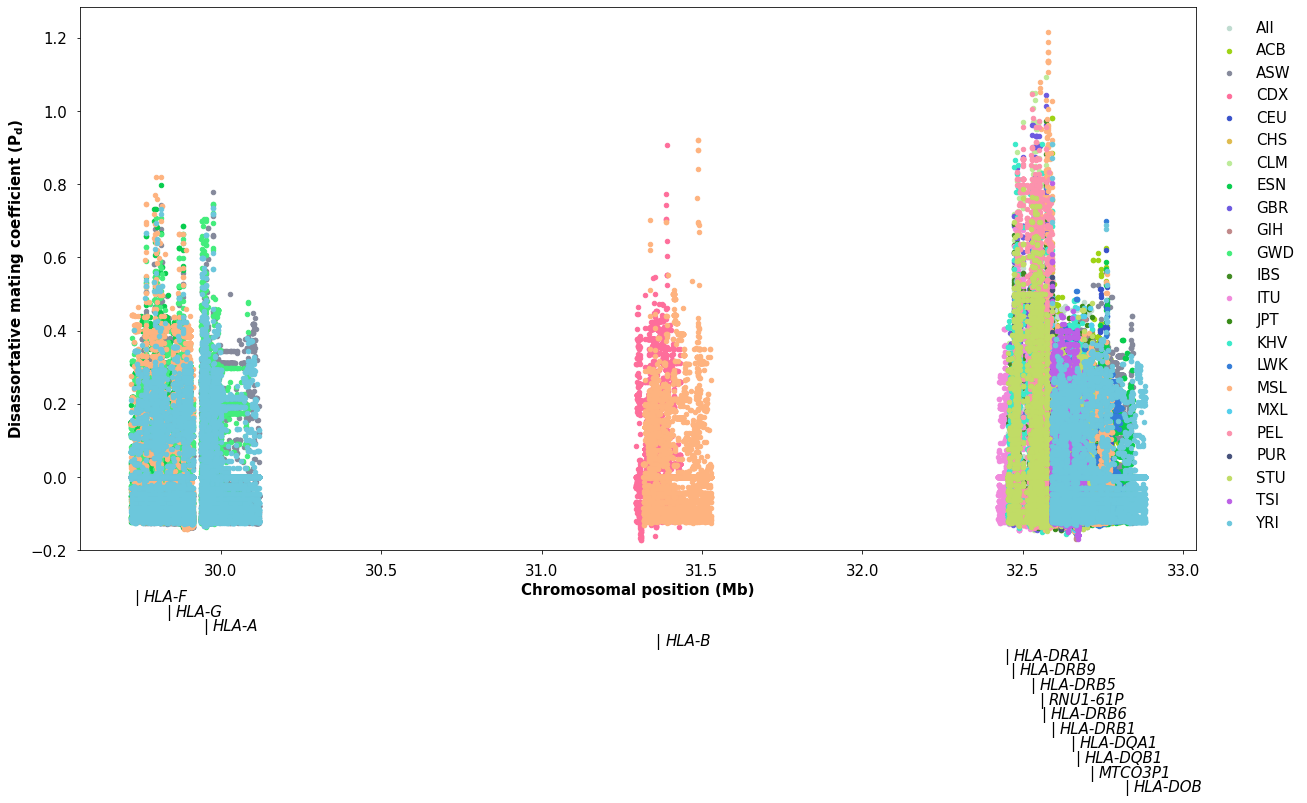

In [190]:
allpositions=[]
allPs=[]
seen_races=set()
plt.figure(figsize=(20,10))
plt.rcParams['grid.linewidth'] = 1.2
plt.rcParams['mathtext.default'] = 'regular'
for race, regiondict in mhc_race_positions_dict.items():
    if regiondict:
        if race=='All':
            for arr in regiondict["mhc"]:
                xvalues=df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])]["Unnamed: 0"].to_list() 
                allpositions+=xvalues
                yvalues=df_all_mhc[(df_all_mhc["Unnamed: 0"]>=arr[0]) & (df_all_mhc["Unnamed: 0"]<=arr[1])]["P"].to_list()
                allPs+=yvalues
                #race_color_dict[race] = zipped_color_list[race] 
                plt.scatter(np.array(xvalues) / 1000000 ,yvalues,color=zipped_color_list[race],s=20) # from mb to b
                if race not in seen_races:
                    plt.scatter([], [], color=zipped_color_list[race], s=1, label=race)
                    seen_races.add(race)
        else:
            for arr in regiondict["mhc"]:
                xvalues=df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])]["Unnamed: 0"].to_list()
                allpositions+=xvalues
                yvalues=df_race_mhc[(df_race_mhc["Unnamed: 0"]>=arr[0]) & (df_race_mhc["Unnamed: 0"]<=arr[1])][race].to_list()
                allPs+=yvalues
               # race_color_dict[race] = zipped_color_list[race]
                plt.scatter(np.array(xvalues) / 1000000 ,yvalues,color=zipped_color_list[race],s=20)  # from mb to b
        
                if race not in seen_races:
                    plt.scatter([], [], color=zipped_color_list[race], s=1, label=race)
                    seen_races.add(race)
            
y_offset = -0.3
for x,y in sort_arr:
    # plt.vlines(x = sim_dict[x], ymin = y_offset-0.01, ymax = y_offset,
        #    colors = 'black')
    # plt.text(x = sim_dict[x]+5000, y = y_offset-0.0085, s=x, fontdict={'fontsize':13})
    plt.text(x = comp_dict[x] / 1000000, y = y_offset-0.04, s="|", fontdict={'fontsize':15})# from mb to b
    plt.text(x = comp_dict[x] / 1000000 + 0.03, y = y_offset-0.04, s=x, fontdict={'fontsize':15}, style='italic')# from mb to b
    y_offset -= 0.04
plt.ylim(-0.2,None)        
                    

plt.tick_params(axis='both', which='major', labelsize=15,pad=10)  
 
# plt.title("Disassortative mating MHC region",fontsize=30)
plt.xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold')
# plt.ylabel(u'P',fontsize=15, weight = 'bold')
plt.ylabel(r"Disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')

order = [ 1, 0,   2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]
handles, labels = plt.gca().get_legend_handles_labels()

legend=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper right",fontsize=15,  bbox_to_anchor=(1.1, 1), frameon=False)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [20] 
plt.savefig("pic3.png",dpi=600,bbox_inches = 'tight') 
# plt.savefig("pic3_sim.pdf",dpi=600,bbox_inches = 'tight')
#plt.savefig("../../formalfigs/pic3_mhc_regions_complementary_05_05_compare.png",dpi=300) 
plt.show()      
